# Ravi Teja Kedarasetty
## Project 1 - Automobile Price Prediction
### DS21APR01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AutoData (1).csv")

In [41]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 25)

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [42]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Taking the first word from make
#### Correcting the spelling names of Make
#### Fill the missing values i.e., NA
#### Handling Categorical Data using LabelEncoding or Dummification
#### Check whether the data is balanced or imbalanced
#### Check for Outliers
#### Finding the correlation

In [43]:
df['make'] = df['make'].str.split(" ").str.slice(0,1).str.join(" ")

In [45]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [50]:
df['make'] = df['make'].str.lower()
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
df['make'].replace("vw","volkswagen",inplace = True)
df['make'].replace("vokswagen","volkswagen",inplace = True)
df['make'].replace("porcshce","porsche",inplace = True)
df['make'].replace("maxda","mazda",inplace = True)
df['make'].replace("toyouta","toyota",inplace = True)

df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
df.isna().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Separating the categorical and Numerical variables

In [12]:
numeric=[]
nonnumeric=[]
for i in df.columns:
    if df[i].dtypes=='int64' or df[i].dtypes=='float64':
        numeric.append(i)
    else:
        nonnumeric.append(i)

In [13]:
numeric

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

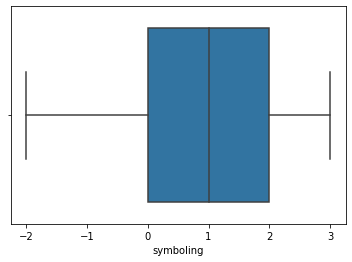

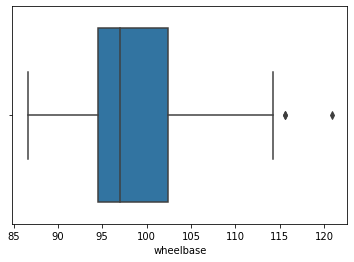

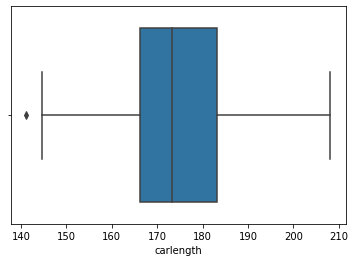

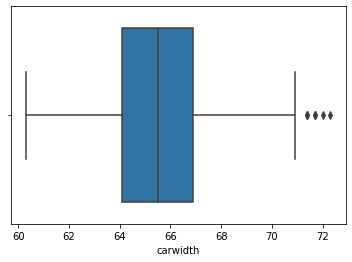

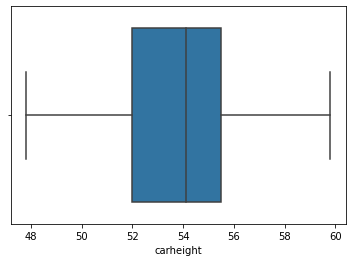

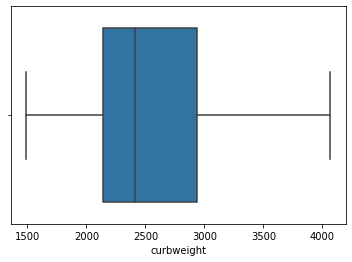

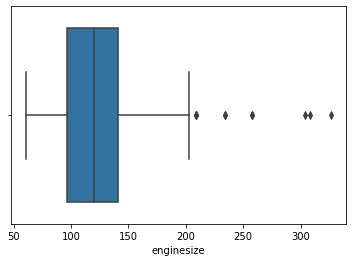

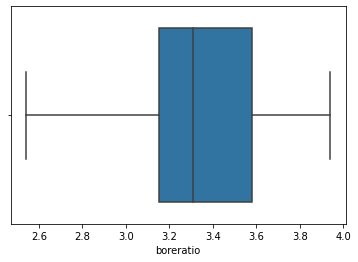

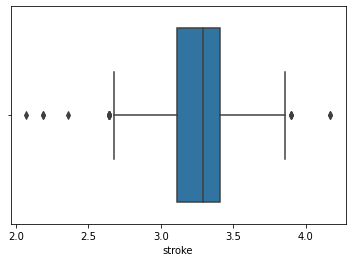

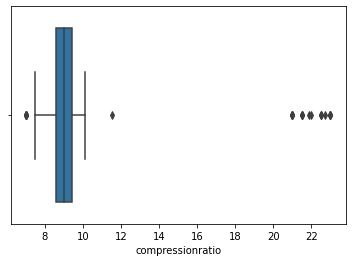

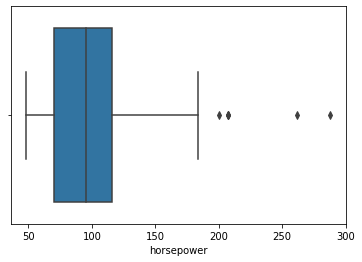

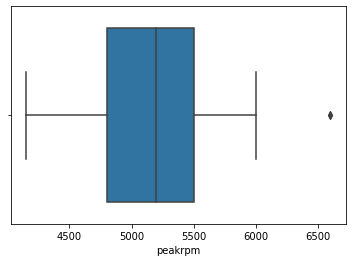

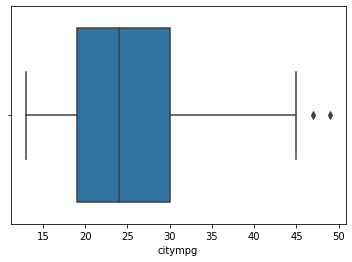

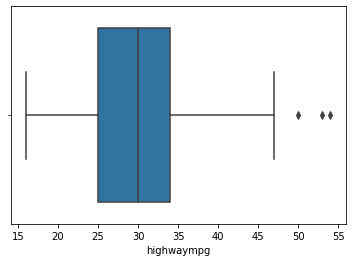

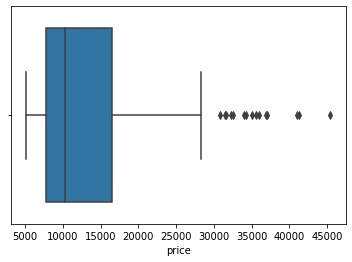

In [14]:
for i in numeric:
    sns.boxplot(x = df[i])
    plt.show()

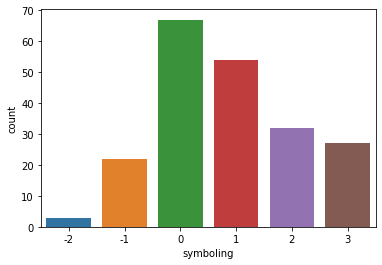

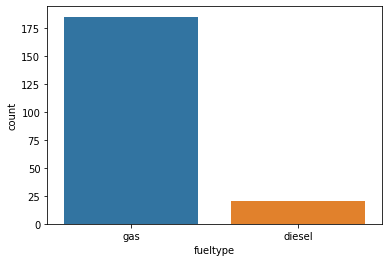

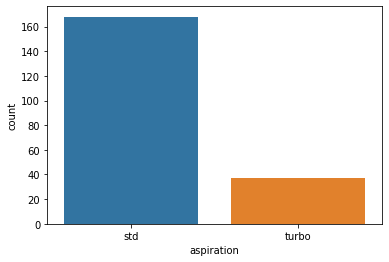

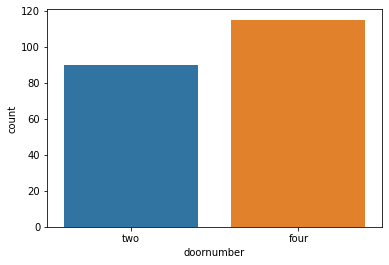

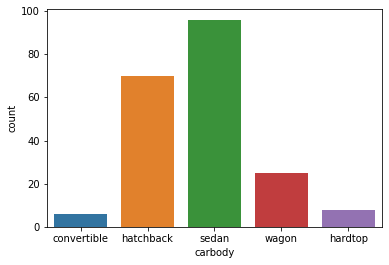

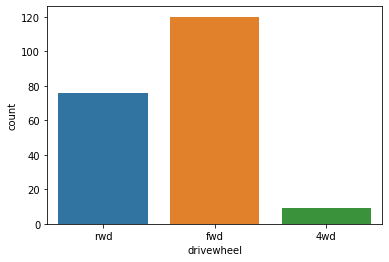

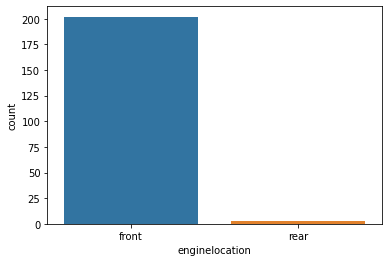

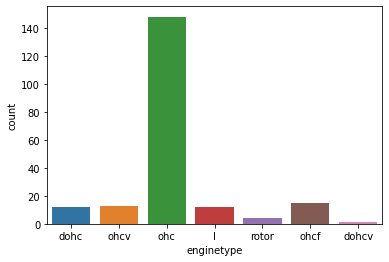

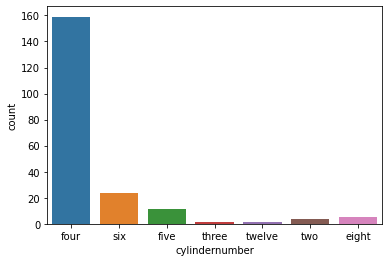

In [51]:
for i in df.columns:
    if df[i].nunique() < 8:
        sns.countplot(x = df[i])
        plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

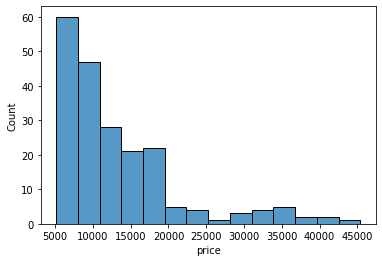

In [52]:
sns.histplot(df['price'])

In [53]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:>

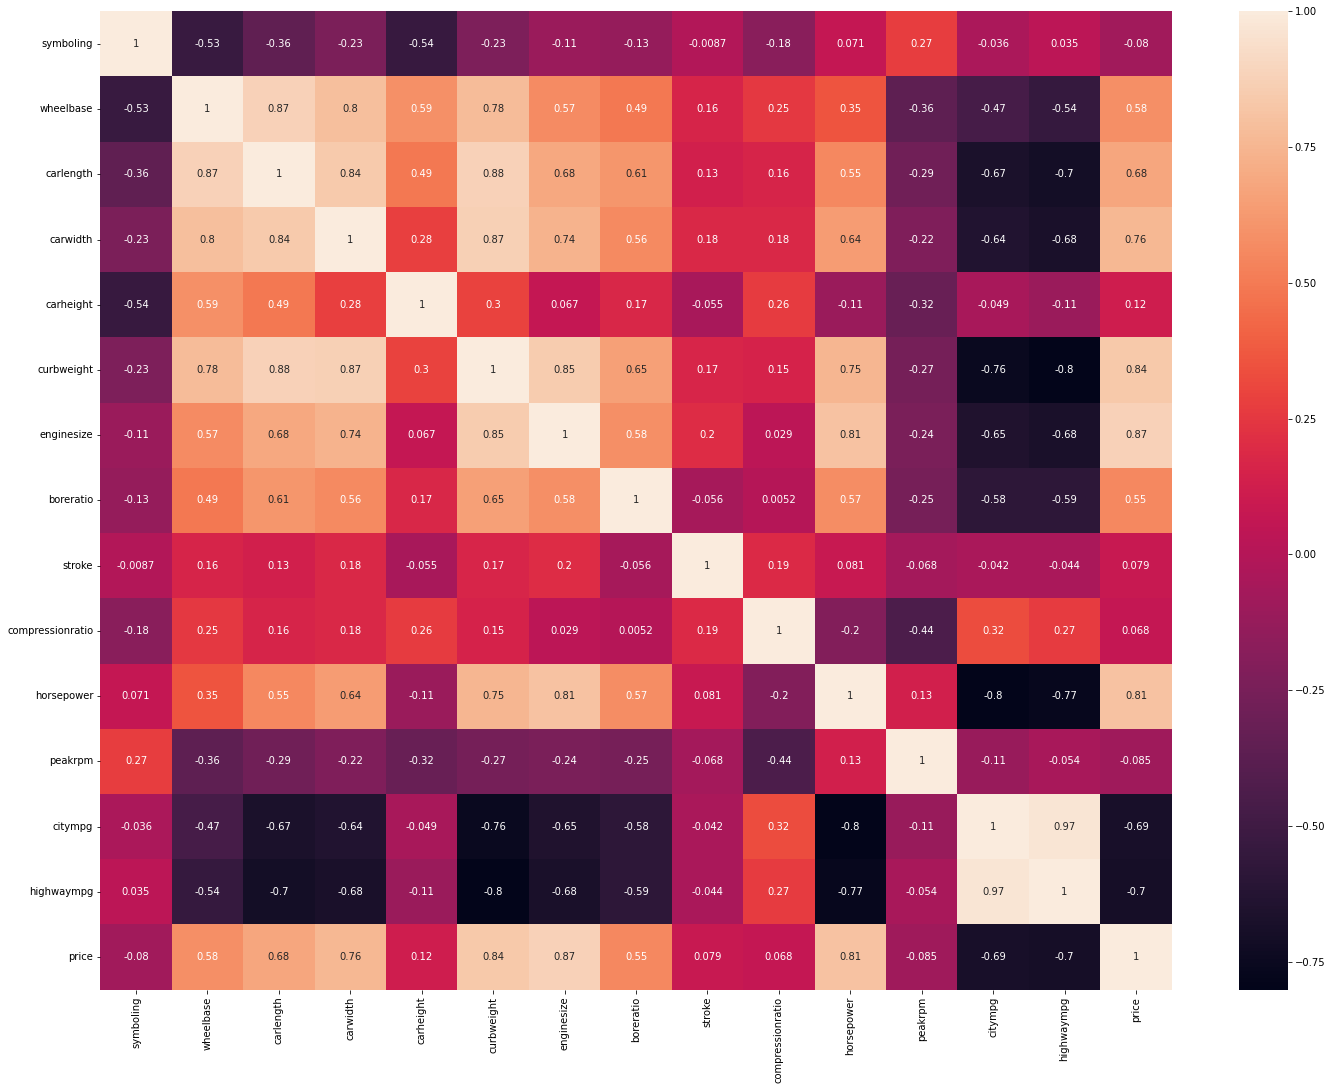

In [54]:
plt.figure(figsize=(24,18))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [55]:
features = df.corr().sort_values(by="price", ascending=False).iloc[:10,:].index
features

Index(['price', 'enginesize', 'curbweight', 'horsepower', 'carwidth',
       'carlength', 'wheelbase', 'boreratio', 'carheight', 'stroke'],
      dtype='object')

In [56]:
df1 = df[features]

In [57]:
fuelsystem = pd.get_dummies(df['fuelsystem'], drop_first = True)
df1 = pd.concat([df1, fuelsystem], axis = 1)
drivewheel = pd.get_dummies(df['drivewheel'], drop_first = True)
df1 = pd.concat([df1, drivewheel], axis = 1)
cylindernumber = pd.get_dummies(df['cylindernumber'], drop_first = True)
df1 = pd.concat([df1, cylindernumber], axis = 1)

### Engine Size is the most correlated feature and is the best variable to perform Simple Linear Regression.

## Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df1.iloc[:,1:]
y = df1['price']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.33,random_state=1)

In [30]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [31]:
Y_pred = model.predict(X_test)

In [32]:
model.score(X_test, Y_test)

0.829205711374754

In [33]:
model.intercept_

-25582.58483095863

In [34]:
# Slope Value - M
model.coef_

array([ 1.67967068e+02, -2.07608149e+00,  6.87512497e+01,  4.27596890e+02,
       -3.55316058e+01,  1.50438520e+01, -4.48675405e+03,  3.17945907e+02,
       -3.91531378e+03, -3.77765483e+01,  5.39509200e+03,  3.25383804e+03,
       -4.54747351e-13, -8.16264549e+01, -4.66733746e+02,  8.25872226e+02,
       -9.96579487e+01,  1.72526095e+03,  4.58158721e+03,  2.08260326e+03,
       -6.93858803e+02,  0.00000000e+00, -1.80504630e+04,  5.39509200e+03])

<AxesSubplot:xlabel='price'>

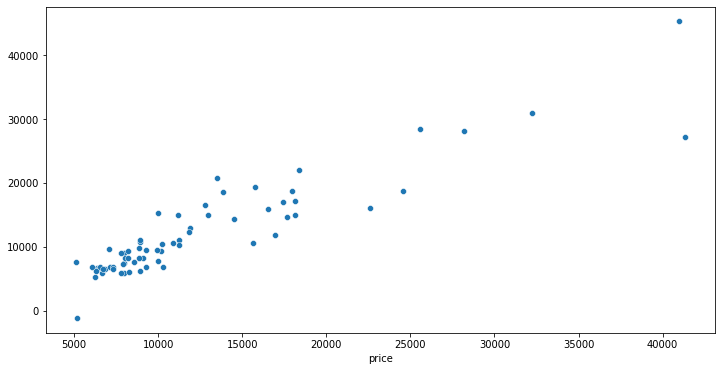

In [59]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=Y_test,y=Y_pred)


In [60]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.829205711374754

In [62]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MSE: 9650135.86146599
MAE: 2048.7546613270106
RMSE: 3106.466781001527


### The Final Price is mostly effected by 'price', 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength' and 'wheelbase' and all these features are positively corelated, so with the increaase in these the price also increases.